In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import cross_val_score
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 
HTML( style )

In [28]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
X = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [31]:
#one hot encoding
X = pd.get_dummies(X)
#заполняем Nan
X = X.fillna({'Age':X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [32]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [33]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
#может работать только с числовыми данными. Все строковые нужно заменить, например пол
#для этого есть label encoding или one hot encoding

In [35]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [36]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
class_names=['Died', 'Survived'], filled=True))
#display(SVG(graph.pipe(format='svg')))
#наблюдаем очень сильный overfitting

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [38]:
clf.score(X_train, y_train)

0.9714765100671141

In [39]:
clf.score(X_test, y_test)

0.9966101694915255

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
clf.score(X_train, y_train)

0.8406040268456376

In [42]:
clf.score(X_test, y_test)

0.8101694915254237

In [43]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [44]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)


In [45]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [46]:
#обьединени score в один столбец с указанием типа
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], \
                          var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [47]:
scores_data_long.query("set_type=='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.805392


<AxesSubplot:xlabel='max_depth', ylabel='score'>

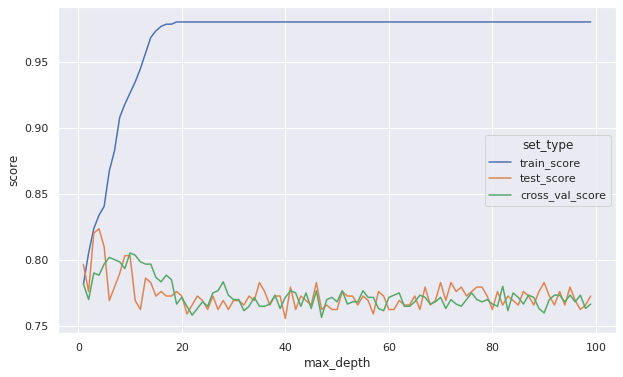

In [48]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

# валидация моделей cross-validation

https://scikit-learn.org/stable/modules/cross_validation.html \
<font size="4">
При k-fold кросс-валидации обучающая выборка разбивается на (k-1) подвыборок и следующий алгоритм выполняется k раз:

- Модель обучается с использованием (k-1) подвыборок в качестве тренировочных данных;
- Полученная модель проверяется на оставшейся одной подвыборке (которая служит тестовым набором для вычисления точности). </font> 

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [144]:
#cv - число folds
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8033898305084746

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:

clf = tree.DecisionTreeClassifier()

In [147]:
params = {'criterion': ['gini', 'entropy'], 'max_depth' : range(1,30)}

In [148]:
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

In [149]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [150]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [151]:
best_clf = grid_search_cv_clf.best_estimator_

In [152]:
best_clf.score(X_test, y_test)

0.7593220338983051

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
y_pred = best_clf.predict(X_test)

In [155]:
precision_score(y_test, y_pred )

0.7289719626168224

In [156]:
recall_score(y_test, y_pred )

0.65

In [157]:
#предсказываем вероятности
y_predicted_probability = best_clf.predict_proba(X_test)
#двумерный массив с вероятностями отнесения к положительному и отрицательному классам
#y_predicted_probability

<AxesSubplot:>

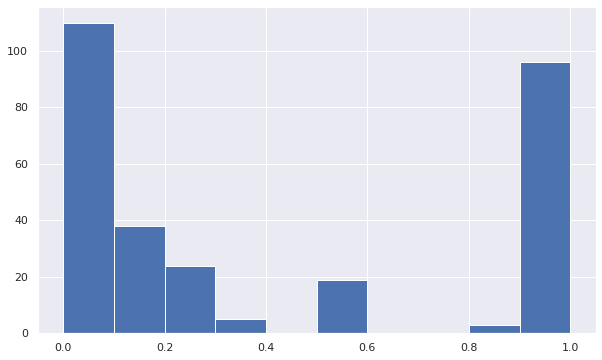

In [166]:
#слева положительные справа отрицательные исходы
pd.Series(y_predicted_probability[:,1]).hist()

In [167]:
y_pred = np.where(y_predicted_probability[:,1] >0.8,1,0)

In [168]:
precision_score(y_test, y_pred )

0.7676767676767676

In [169]:
recall_score(y_test, y_pred )

0.6333333333333333

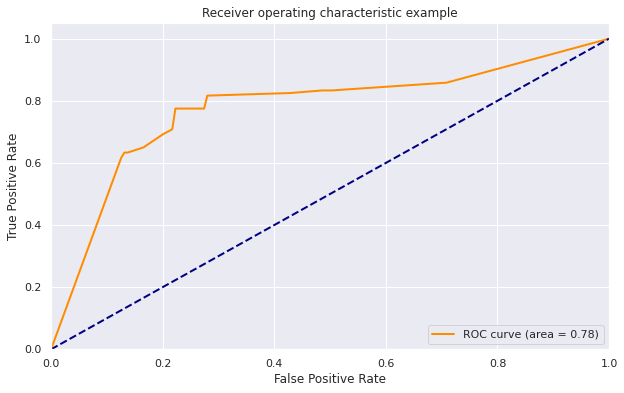

In [172]:
#ROC-кривая
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probability[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()